# Exercise Sheet 1: Neurons
## Konstantinos Tsafatinos 0412276

In [1]:
import numpy as np
from scipy import constants
from matplotlib import pyplot as plt
from matplotlib import ticker, colors

## Task 1: The logistic function (1 point - programming)
Write a function "logistic(h,a=1)" resembling the logistic function and a second function "signtrafunc" the binary (sign-based) tranfer function. Also write a function "dlogistic(h,a=1)" resembling the derivative of the logistic function. Similarly, write a "gaussRBF(h,a=1)" resembling the gaussian Radial Basis Function and "dgaussRBF(h,a=1)" its derivative.

Plot each of them in the range of -10 to 10 together with their derivative (except for the sign-based function) with  matplotlibs plot function (plt.plot)).

For defining the sign-based transfer function the inline definition of functions using the syntax trafunc=lambda x: f(x) might be handy, please write the logistic function, however, as a classical function definition. The a=1 in the function definition sets the default to a=1 so the function needs only 1 argument by default.

In [2]:
def logistic(h,a=1):
    return 1 / (1 + np.exp(- a * h))


def dlogistic(h, a=1):
    return logistic(h, a) * (1 - logistic(h, a))


signtrafunc = lambda x: (np.sign(x) + 1) / 2


def gaussRBF(h, a=1):
    return np.exp(-(a * h)**2)


def dgaussRBF(h, a=1):
    return gaussRBF(h, a) * (-a**2 * 2 * h)

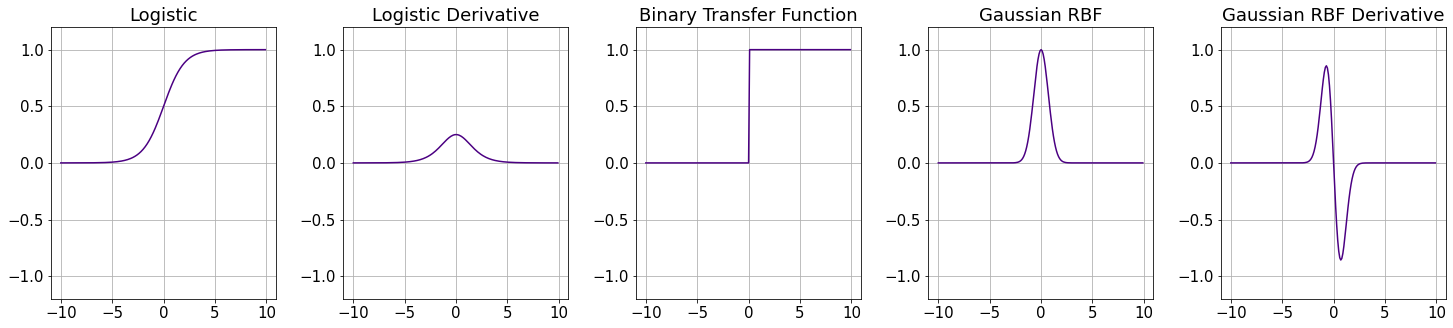

In [3]:
# Define plotting range, figure and variables
x_range = np.arange(-10, 10, 0.1)
fig1 = plt.figure(1, figsize=(25, 5))
fig1.subplots_adjust(wspace=0.3)
funcs = [logistic, dlogistic, signtrafunc, gaussRBF, dgaussRBF]
func_names = [
    'Logistic', 
    'Logistic Derivative', 
    'Binary Transfer Function', 
    'Gaussian RBF', 
    'Gaussian RBF Derivative'
]


for ind, x in enumerate(funcs):
    ax = fig1.add_subplot(1, 5, int(ind+1))
    ax.plot(x_range, x(x_range), color='indigo')
    ax.set_title(func_names[ind], size=18)
    ax.set_ylim(-1.2, 1.2)
    ax.tick_params(axis='x', labelsize=15)
    ax.tick_params(axis='y', labelsize=15)
    ax.grid()

## Task 2: Building an artificial neuron  (2 points - programming)
Define a class "neuron" resembling a simple perceptron. See https://docs.python.org/3/tutorial/classes.html for help on classes.

It should have the attributes "neuron.w" for the weights, "neuron.b" for the bias, the methods "neuron.trafunc(self,h)" for the transfer function, "neuron.dtrafunc(self,h)"  for the first derivative of the transfer function and the method "neuron.out(self,x)" to calculate the output for inputs *x* and *h* respectively. 

Build a constructor method "\__init\__(self,...)", where self refers to the object itself, which assigns the weight vector *x*, the bias *b* , the transfer function "trafunc" and it's derivative "dtrafunc" to the neuron.

The transfer function and its derivative should best be assigned at construction in order to acccount for different possible transfer functions.

In [4]:
class neuron:
    def __init__(self, w, b, func, dfunc = None):
        self.w = w
        self.b = b
        self.trafunc = func
        self.dtrafunc = dfunc
    
    def out(self, x):
        h = np.dot(self.w, x) - self.b
        return self.trafunc(h)

In [5]:
n1 = neuron(x_range, 1, logistic, dlogistic)

## Task 3: Use an artificial neuron (3 points - thinking and programming)
Use instances of the neuron class above to build the equivalents to logical "or" and "and"-functions using the binary (sign-based) transfer function and test them for 2-dimensional input vectors *x* resembling all possibilities of combinations ([0,0] [1,0], [0,1], [1,1]) by setting the weights and bias manually.

First, use the sign-based transfer function to solve the task with exact solution and then apply the same weights w and bias b on a neuron with the logistic and gaussian RBF transfer functions.

What's the difference?

*Hint: if you haven't succeeded with Task 2, you can solve Task 3 analytically and write down the needed weights and results.*

In [6]:
# Define inputs, weights and biases for logical "or" and "and" gates
w_or = [1, 1]
b_or = 0.5
w_and = [1, 1]
b_and = 1.5
x = [[0, 0], [1, 0], [0, 1], [1, 1]] 


# Define neurons using the binary transfer function
neuron1_or=neuron(w_or, b_or, signtrafunc)
neuron1_and=neuron(w_and, b_and, signtrafunc)


# Define neurons using the logistic and gaussian transfer functions
neuron2_or=neuron(w_or, b_or, logistic)
neuron2_and=neuron(w_and, b_and, logistic)
neuron3_or=neuron(w_or, b_or, gaussRBF)
neuron3_and=neuron(w_and, b_and, gaussRBF)


# Print the various outputs of each neuron type using each transfer function
print("Outputs of the 'or' and 'and' Gates: ")
print("====================================")
print("====================================")


print("\nBinary Transfer Function")
print("\nOR Gate Neuron::")
print("================")
for x_i in x:
    print(f"Input: {x_i}; Output: {neuron1_or.out(x_i)}")
print("\nAND Gate Neuron::")
print("=================")
for x_i in x:
    print(f"Input: {x_i}; Output: {neuron1_and.out(x_i)}")
    
    
print("\nLogistic Transfer Function")
print("\nOR Gate Neuron::")
print("================")
for x_i in x:
    print(f"Input: {x_i}; Output: {neuron2_or.out(x_i)}")
print("\nAND Gate Neuron::")
print("=================")
for x_i in x:
    print(f"Input: {x_i}; Output: {neuron2_and.out(x_i)}")
    
    
print("\nGaussian RBF Transfer Function")
print("\nOR Gate Neuron::")
print("================")
for x_i in x:
    print(f"Input: {x_i}; Output: {neuron3_or.out(x_i)}")
print("\nAND Gate Neuron::")
print("=================")
for x_i in x:
    print(f"Input: {x_i}; Output: {neuron3_and.out(x_i)}")

Outputs of the 'or' and 'and' Gates: 

Binary Transfer Function

OR Gate Neuron::
Input: [0, 0]; Output: 0.0
Input: [1, 0]; Output: 1.0
Input: [0, 1]; Output: 1.0
Input: [1, 1]; Output: 1.0

AND Gate Neuron::
Input: [0, 0]; Output: 0.0
Input: [1, 0]; Output: 0.0
Input: [0, 1]; Output: 0.0
Input: [1, 1]; Output: 1.0

Logistic Transfer Function

OR Gate Neuron::
Input: [0, 0]; Output: 0.3775406687981454
Input: [1, 0]; Output: 0.6224593312018546
Input: [0, 1]; Output: 0.6224593312018546
Input: [1, 1]; Output: 0.8175744761936437

AND Gate Neuron::
Input: [0, 0]; Output: 0.18242552380635635
Input: [1, 0]; Output: 0.3775406687981454
Input: [0, 1]; Output: 0.3775406687981454
Input: [1, 1]; Output: 0.6224593312018546

Gaussian RBF Transfer Function

OR Gate Neuron::
Input: [0, 0]; Output: 0.7788007830714049
Input: [1, 0]; Output: 0.7788007830714049
Input: [0, 1]; Output: 0.7788007830714049
Input: [1, 1]; Output: 0.10539922456186433

AND Gate Neuron::
Input: [0, 0]; Output: 0.10539922456186433


Using the weights and biases defined above, we can see that the "or" and "and" gates using the binary transfer function behave as expected; binary output. Comparing the outputs of the neuronal gates using the binary transfer function to the outputs of the neurons using the logisitc and Gaussian RBF transfer functions, when keeping the weights and biases the same, we can notice some differences. First we should note that one main diffenrence is that the output is non-binary and continuous. Using the logisitc transfer function, we can see that larger input values result in outputs closer to 1, and smaller inputs result in outputs closer to 0; to be expected given the shape of the transfer function. Using the Gaussian RBG transfer function, we can see that if the dot product of weights and inputs are near the bias, the outputs are closer to 1. The further away from the bias, the outputs are closer to 0.

## Task 4: The electrical field strength (4 points - analytic derivation)
Analytically derive the electrical field strength $\vec{E}=-\nabla\phi$ of an electrostatic dipole field at origin in an inifinite homogeneous otherwise charge-free space step-by-step from the potential equation $\phi(\vec{r})=\frac{1}{4\pi\epsilon_0}\frac{\vec{p}\cdot\vec{r}}{\left|\vec{r}\right|^3}$ in Cartesian coordinates.

To this extent you will need to build the gradient $\nabla=\left(
\begin{array}{c}
	\frac{\delta}{\delta x}\\
	\frac{\delta}{\delta y}\\
	\frac{\delta}{\delta z}
\end{array}
\right)$!

You can take the dipolar moment $\vec{p}$ to be a constant vector $\vec{p}=\left(
\begin{array}{c}
	p_x\\
	p_y\\
	p_z
\end{array}
\right)$. 

The vector $\vec{r}=\left(
\begin{array}{c}
	x\\
	y\\
	z
\end{array}
\right)$ is the coordinates in cartesian coordinates and  the norm is the euclidean norm $\left|\vec{r}\right|=\sqrt{x^2+y^2+z^2}$.

*Hint: You can hand in the solution in your format of choice: Write direclty below (Markdown takes latex within $$, jsut double-click on the cell below), Pdf from Latex or Word, scan or photo of a hand-written derivation, etc....*

### Solution:
$\vec{E}=- \nabla \phi= -\left(
\begin{array}{c}
	\frac{\delta}{\delta x}\\
	\frac{\delta}{\delta y}\\
	\frac{\delta}{\delta z}
\end{array}
\right)\frac{1}{4\pi\epsilon_0}\frac{\vec{p}\cdot\vec{r}}{\left|\vec{r}\right|^3}
= -\left(
\begin{array}{c}
	\frac{\delta}{\delta x}\\
	\frac{\delta}{\delta y}\\
	\frac{\delta}{\delta z}
\end{array}
\right)\frac{1}{4\pi\epsilon_0}\frac{\left(
\begin{array}{c}
	p_x\\
	p_y\\
	p_z
\end{array}
\right)\cdot\left(
\begin{array}{c}
	x\\
	y\\
	z
\end{array}
\right)}{\sqrt{x^2+y^2+z^2}^3}
= -\frac{1}{4\pi\epsilon_0}\left(
\begin{array}{c}
	\frac{\delta}{\delta x}\\
	\frac{\delta}{\delta y}\\
	\frac{\delta}{\delta z}
\end{array}
\right)\frac{p_x\cdot x + p_y\cdot y + p_z\cdot z}{\sqrt{x^2+y^2+z^2}^3}
= -\frac{1}{4\pi\epsilon_0}\left(
\begin{array}{c}
	\frac{\sqrt{x^2+y^2+z^2}^3 \cdot p_x - \left(p_x\cdot x + p_y\cdot y + p_z\cdot z \right) \cdot       \left(\sqrt{x^2+y^2+z^2}\right) \cdot \left(3x\right)}{\left(x^2+y^2+z^2\right)^3}\\
	\frac{\sqrt{x^2+y^2+z^2}^3 \cdot p_y - \left(p_x\cdot x + p_y\cdot y + p_z\cdot z \right) \cdot \left(\sqrt{x^2+y^2+z^2}\right) \cdot \left(3y\right)}{\left(x^2+y^2+z^2\right)^3}\\
	\frac{\sqrt{x^2+y^2+z^2}^3 \cdot p_z - \left(p_x\cdot x + p_y\cdot y + p_z\cdot z \right) \cdot \left(\sqrt{x^2+y^2+z^2}\right) \cdot \left(3z\right)}{\left(x^2+y^2+z^2\right)^3}
\end{array}
\right)
= -\frac{1}{4\pi\epsilon_0}\left(
\begin{array}{c}
	\frac{p_x}{\left|\vec{r}\right|^3} - 3x\frac{\left(p_x\cdot x + p_y\cdot y + p_z\cdot z \right)}{\left|\vec{r}\right|^5}\\
	\frac{p_y}{\left|\vec{r}\right|^3} - 3y\frac{\left(p_x\cdot x + p_y\cdot y + p_z\cdot z \right)}{\left|\vec{r}\right|^5}\\
	\frac{p_z}{\left|\vec{r}\right|^3} - 3z\frac{\left(p_x\cdot x + p_y\cdot y + p_z\cdot z \right)}{\left|\vec{r}\right|^5}
\end{array}
\right)
= -\frac{1}{4\pi\epsilon_0}\left(
\begin{array}{c}
	\frac{p_x}{\left|\vec{r}\right|^3} - 3x\frac{\vec{p}\cdot\vec{r}}{\left|\vec{r}\right|^5}\\
	\frac{p_y}{\left|\vec{r}\right|^3} - 3y\frac{\vec{p}\cdot\vec{r}}{\left|\vec{r}\right|^5}\\
	\frac{p_z}{\left|\vec{r}\right|^3} - 3z\frac{\vec{p}\cdot\vec{r}}{\left|\vec{r}\right|^5}
\end{array}
\right)
= -\frac{1}{4\pi\epsilon_0} \left( \frac{\vec{p}}{\left|\vec{r}\right|^3} - 3\vec{r}\frac{\vec{p}\cdot\vec{r}}{\left|\vec{r}\right|^5} \right)
= \frac{1}{4\pi\epsilon_0} \left( 3\vec{r}\frac{\vec{p}\cdot\vec{r}}{\left|\vec{r}\right|^5} - \frac{\vec{p}}{\left|\vec{r}\right|^3}\right) = \vec{E} 
$

## Task 5: Current density & potential of a single PSP (5 points - programming)
Write a python function resembling the electrical field potential $\phi(\vec{r},\vec{r}_q)$ and another one for the current density $\vec{J}$ of a current dipole in infinite homogeneous conductive space at point $\vec{r}_q$ in Cartesian coordinates. The function should take the position of the observed point $\vec{r}$, the position of the dipole $\vec{r}_q$, the dipole moment produced by the source  $\vec{Q}$ and the conductivity $\sigma$ as inputs and return the resulting scalar potential/the current density of the volumce conduction, respectively.  $\vec{r}_q$ should be set to the origin by default. 

$\phi(\vec{r})=\frac{1}{4\pi\sigma}\frac{\vec{Q}\cdot\left(\vec{r}-\vec{r}_q\right)}{\left|\vec{r}-\vec{r}_q\right|^3}$

$\vec{J}=\frac{1}{4 \pi } \left(3 \frac{\left(\vec{r}-\vec{r}_q\right) \cdot \vec{Q}}{\left|\vec{r}-\vec{r}_q\right|^5} \cdot \left(\vec{r}-\vec{r}_q\right)-\frac{\vec{Q}}{\left|\vec{r}-\vec{r}_q\right|^3}\right)$

$\sigma$ is the specific conductivity of the material (a constant) and $\vec{Q}$ is the dipole moment at the source (neuron). For brain tissue, the conductivity is around $\sigma=0.33\frac{S}{m}$.

Make a plot of the two variables in two dimensions from -10cm to 10cm for both axes in the x/y-plane for a dipole at origin with dipole moment $\vec{Q}=[20,0]fAm$.
Plot the potential using the matlpotlib function plt.contour for plotting and the current density using the function plt.streamplot. Draw both plots into the same figure.

Hints: 
- Numpy's tensordot might simplify the treatment of multiple positions at once.
- The arguments to the plot function call for $\vec{J}$- and $\phi$- values need the shape corresponding to the XX and YY variables from np.meshgrid.
- Increase the number of contours in plt.contour to get a nicer distribution of isopotential lines or better use a logarithmic scaling
- you may use contourf to add colors



In [7]:
# Initialize the variables (x and y in mm, p as a unit dipole with 1Cmm)
x=np.arange(-10, 10, 0.1)
y=np.arange(-10, 10, 0.1)
r_0=np.array([0, 0]).reshape(-1, 1, 1)
Q=np.array([20, 0])*1e-15 # Am
sigma = 0.33 # s/m



# Create the meshgrid for calculation and plotting (in SI --> m)
XX,YY=np.meshgrid(x/100,y/100)
r = np.array([XX, YY])


# Define electric field potential and current density functions
def phi_dip(r, Q, sigma, r_0 = [0, 0]):
    dist = r - r_0
    norm = np.linalg.norm(dist, axis = 0)
    return 1 / (4 * np.pi * sigma) * np.tensordot(Q, dist, axes = 1) / norm**3


def J_dip(r, Q, r_0 = [0, 0]):
    const = 1 / (4 * np.pi)
    dist = r - r_0
    norm = np.linalg.norm(dist, axis = 0)
    first_term = 3 * np.tensordot(Q, dist, axes = 1) / norm**5 * dist
    second_term = Q.reshape(-1, 1, 1) / norm**3
    return  const * (first_term - second_term) 


# Calculate the potential on the whole meshgrid 
phi=phi_dip(r, Q , sigma, r_0)


# Calculate the current source density on the whole meshgrid 
J=J_dip(r, Q, r_0)

In [8]:
def plot_dipole(XX, YY, phi, J):
    plt.figure(figsize=(15, 8))
    plt.title("Dipole Electric Field Potential and Current Density")
    plt.xlabel('x [m]')
    plt.ylabel('y [m]')
    cs = plt.contour(
        XX,
        YY,
        phi,
        locator=ticker.SymmetricalLogLocator(
            subs=(1, ),
            linthresh=np.abs(phi).min(),
            base=10
        ),
        colors = "black",
        norm=colors.SymLogNorm(
            linthresh=np.abs(phi).min(),
            linscale=0.1,
            vmin=phi.min(),
            vmax=phi.max()
        ),
        vmin=phi.min(),
        vmax=phi.max()
    )
    cs = plt.contourf(
        XX,
        YY,
        phi,
        locator=ticker.SymmetricalLogLocator(
            subs=(1, ),
            linthresh=np.abs(phi).min(),
            base=10
        ),
        norm=colors.SymLogNorm(
            linthresh=np.abs(phi).min(),
            linscale=0.1,
            vmin=phi.min(),
            vmax=phi.max()
        ),
        vmin=phi.min(),
        vmax=phi.max()
    )
    st = plt.streamplot(XX[0, :], YY[:, 0], J[0], J[1], arrowsize=1.5, color='olive')
    plt.colorbar(mappable=cs)
    plt.show()

<ipython-input-8-8ea6bc1086eb>:16: MatplotlibDeprecationWarning: default base will change from np.e to 10 in 3.4.  To suppress this warning specify the base keyword argument.
  norm=colors.SymLogNorm(
<ipython-input-8-8ea6bc1086eb>:34: MatplotlibDeprecationWarning: default base will change from np.e to 10 in 3.4.  To suppress this warning specify the base keyword argument.
  norm=colors.SymLogNorm(


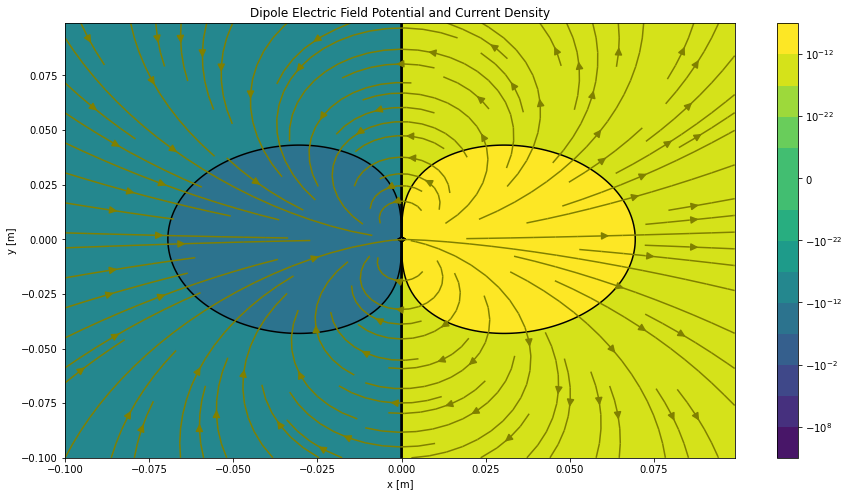

In [9]:
plot_dipole(XX, YY, phi, J)

Above we have the plot of the dipole field potential and current density for all positions in our meshgrid. We can observe that the diploe is aligned and roughly symmetric about the x-axis. **NOTE:** I recieved help from Ikhwan Khalid on how to use the arguments of plt.contour.